lat =  35.690155 42.136677
lon =  -124.45009 -113.741455
Shape of NEI array =  (24, 20, 169, 215)
NEI Emissions, HR: 00 NEI_fig00.png
Vertical Level =  1
Vertical Level =  2
Vertical Level =  3
Vertical Level =  4
Vertical Level =  5
Vertical Level =  6
Vertical Level =  7
Vertical Level =  8
Vertical Level =  9
Vertical Level = 10
Vertical Level = 11
Vertical Level = 12
Vertical Level = 13
Vertical Level = 14
Vertical Level = 15
Vertical Level = 16
Vertical Level = 17
Vertical Level = 18
Vertical Level = 19
Vertical Level = 20
NEI Emissions, HR: 01 NEI_fig01.png
Vertical Level =  1
Vertical Level =  2
Vertical Level =  3
Vertical Level =  4
Vertical Level =  5
Vertical Level =  6
Vertical Level =  7
Vertical Level =  8
Vertical Level =  9
Vertical Level = 10
Vertical Level = 11
Vertical Level = 12
Vertical Level = 13
Vertical Level = 14
Vertical Level = 15
Vertical Level = 16
Vertical Level = 17
Vertical Level = 18
Vertical Level = 19
Vertical Level = 20
NEI Emissions, HR: 02 NEI_fig0

Vertical Level = 12
Vertical Level = 13
Vertical Level = 14
Vertical Level = 15
Vertical Level = 16
Vertical Level = 17
Vertical Level = 18
Vertical Level = 19
Vertical Level = 20
NEI Emissions, HR: 19 NEI_fig19.png
Vertical Level =  1
Vertical Level =  2
Vertical Level =  3
Vertical Level =  4
Vertical Level =  5
Vertical Level =  6
Vertical Level =  7
Vertical Level =  8
Vertical Level =  9
Vertical Level = 10
Vertical Level = 11
Vertical Level = 12
Vertical Level = 13
Vertical Level = 14
Vertical Level = 15
Vertical Level = 16
Vertical Level = 17
Vertical Level = 18
Vertical Level = 19
Vertical Level = 20
NEI Emissions, HR: 20 NEI_fig20.png
Vertical Level =  1
Vertical Level =  2
Vertical Level =  3
Vertical Level =  4
Vertical Level =  5
Vertical Level =  6
Vertical Level =  7
Vertical Level =  8
Vertical Level =  9
Vertical Level = 10
Vertical Level = 11
Vertical Level = 12
Vertical Level = 13
Vertical Level = 14
Vertical Level = 15
Vertical Level = 16
Vertical Level = 17
Vertical

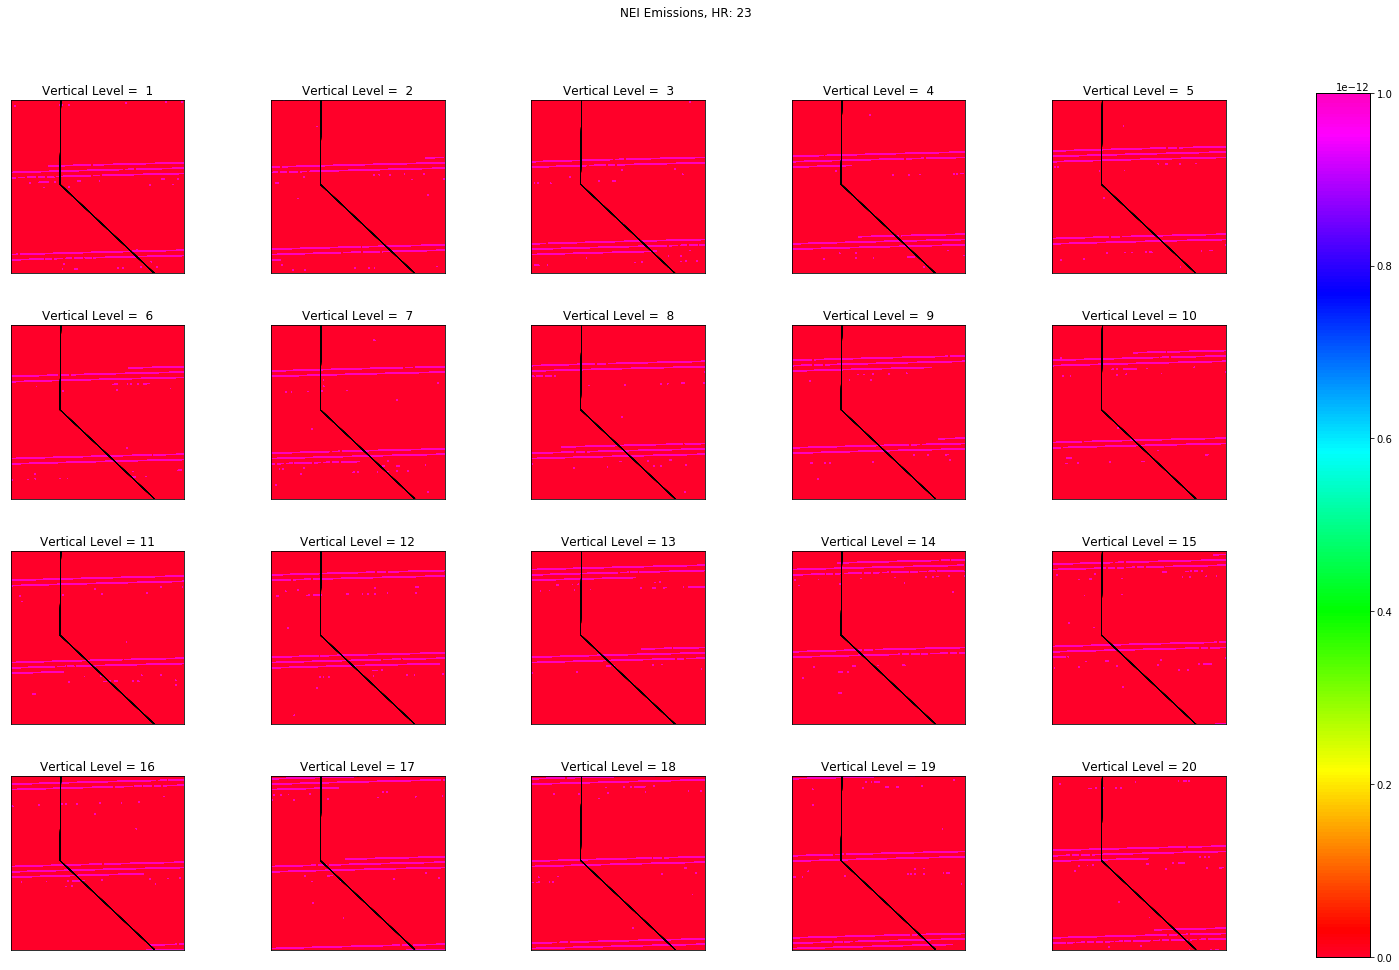

In [31]:
# This code plots emission data from netCDF files

# Import libraries
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap
from time import sleep
from matplotlib import animation
import warnings
warnings.filterwarnings('ignore')

# Get lat/lon data
out1 = Dataset('wrfinput_d01', mode='r')
lon = out1.variables['XLONG'][0][:]
lat = out1.variables['XLAT'][0][:]
out1.close()
lon0 = lon.mean()
lat0 = lat.mean()
latmax = lat.max()
latmin = lat.min()
lonmax = lon.max()
lonmin = lon.min()

print('lat = ', latmin, latmax)
print('lon = ', lonmin, lonmax)

# Set base map options
m = Basemap(width=400000,height=400000, projection='lcc',resolution = 'l',lat_0=lat0,lon_0=lon0)
xi, yi = m(lon,lat)
def makemap(tra):
    m.drawstates()
    m.drawcoastlines()
    m.pcolor(xi,yi,tra,vmin=0,vmax=1e-12, cmap='gist_rainbow');



# Import NEI Data
filen_0 = 'wrfchemi_00z_d01'
fileID_0 = Dataset(filen_0, mode='r')
data0 = fileID_0.variables['E_CO'][:][:][:][:]
filen_12 = 'wrfchemi_00z_d01'
fileID_12 = Dataset(filen_12, mode='r')
data12 = fileID_12.variables['E_CO'][:][:][:][:]
data = np.concatenate((data0,data12), axis = 0)
ds = data.shape
print('Shape of NEI array = ', ds)
fileID_0.close()
fileID_12.close()

# Constant Values
H = ds[0] # Number of Hours
Z = ds[1] # Number of vertical levels
I = ds[2] # Number of meridional (NS) grid points
J = ds[3] # Number of zonal Grid points




# Set up subplotlot 
M = 4 # subplots in the vertical
N = 5 # Subplots in the horizontal
fig,axs = plt.subplots(M,N,figsize=(25,15))

# Make subplots
for i in range(0,H): # Hours 
    title = "NEI Emissions, HR: %02d" %i
    picname = 'NEI_fig' + "%02d" %i +'.png'
    print(title, picname)
    fig.suptitle(title)
    caxx = fig.add_axes([0.85,0.1,0.03,0.8])
    plt.subplots_adjust(wspace=0.5, right=0.8, top=0.9, bottom=0.1)
    for j in range(0,Z): # Levels
        sbname = "Vertical Level = %2d" %(j+1)
        print(sbname)
        plt.subplot(M,N,j+1)
        plt.title(sbname)
        makemap(data[i,j,:,:])
    plt.colorbar(cax=caxx, ax=axs)
    plt.savefig(picname)